# Day 11: Dynamic Programming Again

### BUSI520 - Python for Business Research
### Kerry Back, JGSB, Rice University

In [1]:
import numpy as np
from scipy.optimize import minimize

u = np.sqrt
delta = 0.9    

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

class Approximator(nn.Module):
    def __init__(self):
        super(Approximator, self).__init__()

        # first hidden layer consists of 64 neurons
        self.fc1 = nn.Linear(1, 64)

        # second hidden layer consists of 64 neurons
        self.fc2 = nn.Linear(64, 64)

        # output layer consists of 1 neuron
        self.fc3 = nn.Linear(64, 1)

    # forward pass through all three layers
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Define a custom loss function
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()
 
    def forward(self, predictions, targets):
        return nn.MSELoss()(predictions, targets)

# fit neural network 

model = Approximator()
optimizer = optim.Adam(model.parameters(), lr=0.01)
custom_loss = CustomLoss()

def neural_network(cake_grid, value_arr, num_epochs = 100):
    cake_grid = torch.tensor(cake_grid.reshape(-1, 1)).float()
    value_arr = torch.tensor(value_arr).float()
    for epoch in range(num_epochs):
        model.train() 
        optimizer.zero_grad()
        outputs = model(cake_grid)
        loss = custom_loss(outputs, value_arr)
        loss.backward()
        optimizer.step()
        print("Epoch:", epoch, "Loss:", loss.item())
    return lambda x: model(torch.tensor(x.reshape(-1, 1)).float()).detach().numpy()


In [16]:
# bellman is same as before
def bellman(V, cake):
    if cake == 0:
        return 0, 0
    else:
        rhs = lambda consume: - u(consume) - delta * V(cake - consume)
        result = minimize(rhs, 0.5*cake, bounds=[(0, cake)])
        return - result.fun, result.x.item

def value_iteration(V):

    # generate random cake grid (not important in 1 dimension)
    cake_grid = np.random.uniform(0, 1, 100)

    # same code as before
    value_arr = np.empty_like(cake_grid)
    for i, c in enumerate(cake_grid):
        value, action = bellman(V, c)
        value_arr[i] = value

    # replace interpolation with neural network
    Vnew = neural_network(cake_grid, value_arr)
    
    return Vnew

# fixed_point is same as before
def fixed_point(tol=1e-6, max_iter=2000):
    cake_grid = np.random.uniform(0, 1, 100)
    err = 1
    iter = 0
    V = lambda c: 0
    while (err > tol) & (iter < max_iter):
        Vnew = value_iteration(V)
        err = ((V(cake_grid) - Vnew(cake_grid))**2).sum()
        V = Vnew
        iter += 1
    return V, err, iter

# run is same as before except skipping policy
fp = fixed_point()
V = fp[0]
print("Converged after", fp[2], "iterations")
print("Error is", fp[1])

c:\Users\kerry\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 Loss: 0.32778221368789673
Epoch: 1 Loss: 0.09940048307180405
Epoch: 2 Loss: 0.0770735815167427
Epoch: 3 Loss: 0.12997035682201385
Epoch: 4 Loss: 0.10970750451087952
Epoch: 5 Loss: 0.07464651763439178
Epoch: 6 Loss: 0.062040869146585464
Epoch: 7 Loss: 0.06787030398845673
Epoch: 8 Loss: 0.0775156244635582
Epoch: 9 Loss: 0.08288733661174774
Epoch: 10 Loss: 0.08213327080011368
Epoch: 11 Loss: 0.07672923058271408
Epoch: 12 Loss: 0.06961895525455475
Epoch: 13 Loss: 0.06395135819911957
Epoch: 14 Loss: 0.061974070966243744
Epoch: 15 Loss: 0.06396376341581345
Epoch: 16 Loss: 0.06785227358341217
Epoch: 17 Loss: 0.07050967961549759
Epoch: 18 Loss: 0.07009630650281906
Epoch: 19 Loss: 0.06722778081893921
Epoch: 20 Loss: 0.06398110836744308
Epoch: 21 Loss: 0.06213132292032242
Epoch: 22 Loss: 0.062176868319511414
Epoch: 23 Loss: 0.06347867846488953
Epoch: 24 Loss: 0.06495700776576996
Epoch: 25 Loss: 0.06573748588562012
Epoch: 26 Loss: 0.06548120826482773
Epoch: 27 Loss: 0.06440088897943497
E

### Compare value functions

The true value function is
$$V(x) = \sqrt{\frac{x}{1-\delta^2}}$$

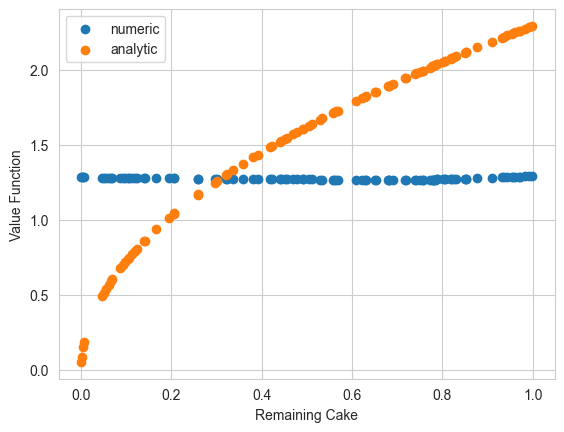

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
cake_grid = np.random.uniform(0, 1, 100)

# numeric solution
plt.scatter(cake_grid, V(cake_grid), label="numeric")

# analytic solution
plt.scatter(cake_grid, [np.sqrt(x/(1-delta**2)) for x in cake_grid], label="analytic")  

plt.xlabel("Remaining Cake")
plt.ylabel("Value Function")
plt.legend()
plt.show()

### Compare policy functions 

The true optimal policy is 

$$c^*(x) = (1-\delta^2)x.$$

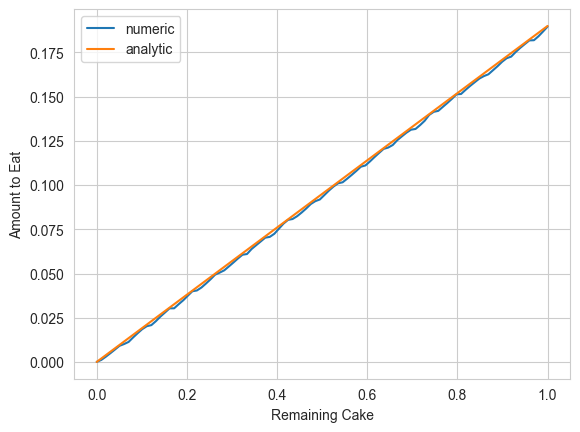

In [8]:
# numeric solution
plt.plot(cake_grid, [policy(c) for c in cake_grid], label="numeric")

# analytic solution
plt.plot(cake_grid, [(1-delta**2)*x for x in cake_grid], label="analytic")  

plt.xlabel("Remaining Cake")
plt.ylabel("Amount to Eat")
plt.legend()
plt.show()